In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Welcome to JupyROOT 6.22/00


In [2]:
rqdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/rq"
#series = "07220608_1606"
series = "07220205_1128"
# eventTree = uproot.concatenate(rqdir+series+"/*.root:rqDir/eventTree")
# zip1 = uproot.concatenate(rqdir+series+"/*.root:rqDir/zip1")
rqfiles = []

for rq in sorted(os.listdir(rqdir+"/"+series)):
    rqfiles.append(uproot.open(rqdir+"/"+series+"/"+rq))
    print("File added: ",rq)
    

File added:  umn_07220205_1128_F0001.root
File added:  umn_07220205_1128_F0002.root
File added:  umn_07220205_1128_F0003.root
File added:  umn_07220205_1128_F0004.root
File added:  umn_07220205_1128_F0005.root
File added:  umn_07220205_1128_F0006.root
File added:  umn_07220205_1128_F0007.root
File added:  umn_07220205_1128_F0008.root
File added:  umn_07220205_1128_F0009.root
File added:  umn_07220205_1128_F0010.root
File added:  umn_07220205_1128_F0011.root
File added:  umn_07220205_1128_F0012.root
File added:  umn_07220205_1128_F0013.root
File added:  umn_07220205_1128_F0014.root
File added:  umn_07220205_1128_F0015.root
File added:  umn_07220205_1128_F0016.root
File added:  umn_07220205_1128_F0017.root
File added:  umn_07220205_1128_F0018.root
File added:  umn_07220205_1128_F0019.root
File added:  umn_07220205_1128_F0020.root
File added:  umn_07220205_1128_F0021.root
File added:  umn_07220205_1128_F0022.root
File added:  umn_07220205_1128_F0023.root
File added:  umn_07220205_1128_F00

In [77]:
rqfiles[0]["rqDir/zip1"].show()

DetType                    (no streamer)              asdtype('>f8')
Empty                      (no streamer)              asdtype('>f8')
PAINTall                   (no streamer)              asdtype('>f8')
PAOFamps                   (no streamer)              asdtype('>f8')
PAOFamps0                  (no streamer)              asdtype('>f8')
PAOFchisq                  (no streamer)              asdtype('>f8')
PAOFchisqLF                (no streamer)              asdtype('>f8')
PAOFdelay                  (no streamer)              asdtype('>f8')
PATFPamp                   (no streamer)              asdtype('>f8')
PATFPchisq                 (no streamer)              asdtype('>f8')
PATFPeflag                 (no streamer)              asdtype('>f8')
PATFPint                   (no streamer)              asdtype('>f8')
PATFPoffset                (no streamer)              asdtype('>f8')
PATFPtau                   (no streamer)              asdtype('>f8')
PAWKf20                    (no str

In [3]:
events = {
    'series' : series
}

eventTree = ['EventCategory']
zip1 = ['PTOFamps','PAOFamps','PBOFamps','PCOFamps','PEOFamps','PDOFamps','PEOFamps',
        'PTINTall','PAINTall','PBINTall','PCINTall','PEINTall','PDINTall','PEINTall',
       'PTOFchisq','PAOFchisq','PBOFchisq','PCOFchisq','PEOFchisq','PDOFchisq','PEOFchisq']

for i in tqdm(range(len(rqfiles))):
    for branch in eventTree:
        if(i == 0):
            events[branch] = rqfiles[i]["rqDir/eventTree"][branch].array()
        else:
            events[branch] = np.concatenate((events[branch],rqfiles[i]["rqDir/eventTree"][branch].array()))
    for branch in zip1:
        if(i == 0):
            events[branch] = rqfiles[i]["rqDir/zip1"][branch].array()
        else:
            events[branch] = np.concatenate((events[branch],rqfiles[i]["rqDir/zip1"][branch].array()))

100%|██████████| 33/33 [01:07<00:00,  2.04s/it]


In [29]:
events.keys()
# len(events['PAOFamps'])

dict_keys(['series', 'EventCategory', 'PTOFamps', 'PAOFamps', 'PBOFamps', 'PCOFamps', 'PEOFamps', 'PDOFamps', 'PTINTall', 'PAINTall', 'PBINTall', 'PCINTall', 'PEINTall', 'PDINTall', 'PTOFchisq', 'PAOFchisq', 'PBOFchisq', 'PCOFchisq', 'PEOFchisq', 'PDOFchisq'])

In [30]:
# Masks
mask = (events['EventCategory'] == 0)
print(len(mask == True))
np.count_nonzero(mask)

43010


42010

(array([42010.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

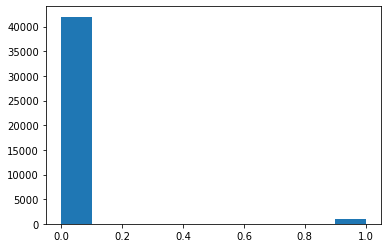

In [31]:
# plt.hist(eventCategory,bins=8,range=[-1,3])
plt.hist(events['EventCategory'])

/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


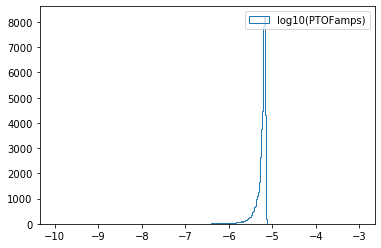

In [32]:
plt.hist(np.log10(events['PTOFamps'][mask]),bins=300,range=[-10,-3],histtype='step',label="log10(PTOFamps)")
plt.legend(loc='best')

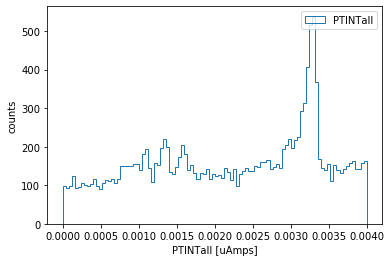

In [33]:
plt.hist(events['PTINTall'][mask],bins=100,range=[0,4e-3],histtype='step',label="PTINTall")
plt.xlabel('PTINTall [uAmps]')
plt.ylabel('counts')
plt.legend(loc='best')

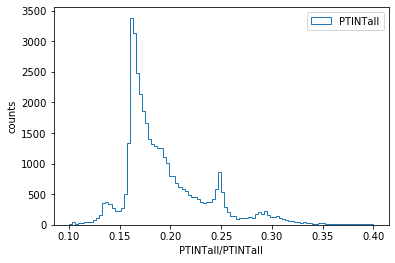

In [34]:
plt.hist(events['PCINTall'][mask]/events['PTINTall'][mask],bins=100,range=[0.1,0.4],histtype='step',label="PTINTall")
plt.xlabel('PTINTall/PTINTall')
plt.ylabel('counts')
plt.legend(loc='best')

Text(0, 0.5, 'PTINTall/PTINTall')

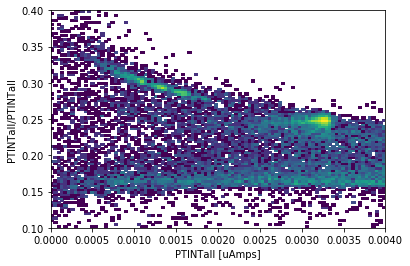

In [35]:
#plt.hist2d(PCINTall[mask]/PTINTall[mask],PTINTall[mask],norm=mpl.colors.LogNorm(),bins=[10,10], range=[[0,4e-3],[0.1,0.4]])
plt.hist2d(events['PTINTall'][mask],events['PCINTall'][mask]/events['PTINTall'][mask],norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,4e-3],[0.1,0.4]])

plt.xlabel('PTINTall [uAmps]')
plt.ylabel('PTINTall/PTINTall')

Text(0, 0.5, 'chi2')

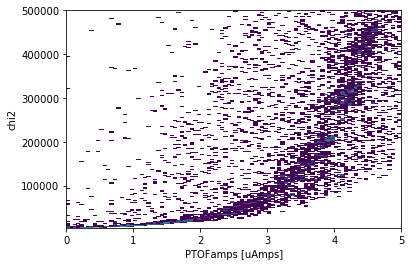

In [36]:
plt.hist2d(events['PTOFamps'][mask]*1e6,events['PTOFchisq'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

plt.xlabel('PTOFamps [uAmps]')
plt.ylabel('chi2')

(0, 2000)

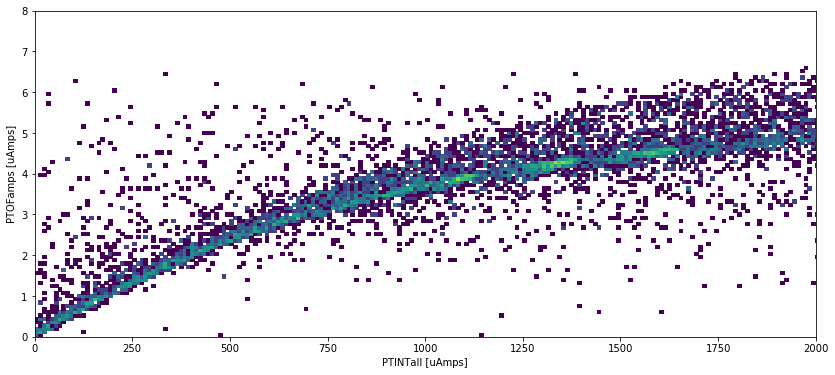

In [37]:
fig = plt.figure(figsize=(14.0,6.0))
plt.hist2d(events['PTINTall'][mask]*1e6,events['PTOFamps'][mask]*1e6,norm=mpl.colors.LogNorm(),bins=[1000,100], range=[[0,10000],[0,8]])

plt.xlabel('PTINTall [uAmps]')
plt.ylabel('PTOFamps [uAmps]')
plt.xlim(0,2000)

Text(0, 0.5, 'counts')

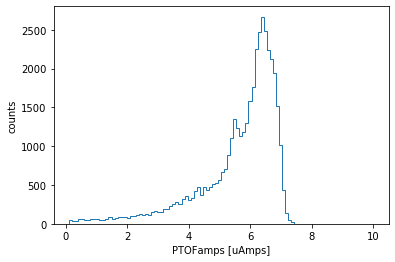

In [38]:
plt.hist(events['PTOFamps'][mask]*1e6,bins=100,range=[0.1,10],histtype='step',label="PTOFamps")
plt.xlabel('PTOFamps [uAmps]')
plt.ylabel('counts')


Text(0, 0.5, 'PTOFamps [uAmps]')

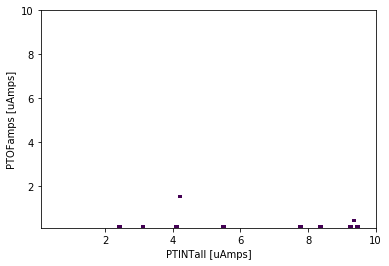

In [39]:
plt.hist2d(events['PTINTall'][mask]*1e6,events['PTOFamps'][mask]*1e6,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0.1,10],[0.1,10]])

plt.xlabel('PTINTall [uAmps]')
plt.ylabel('PTOFamps [uAmps]')


100%|██████████| 43010/43010 [00:00<00:00, 228441.45it/s]
Warning in <TROOT::Append>: Replacing existing TH1: hist2D (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_PTOF_chi2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


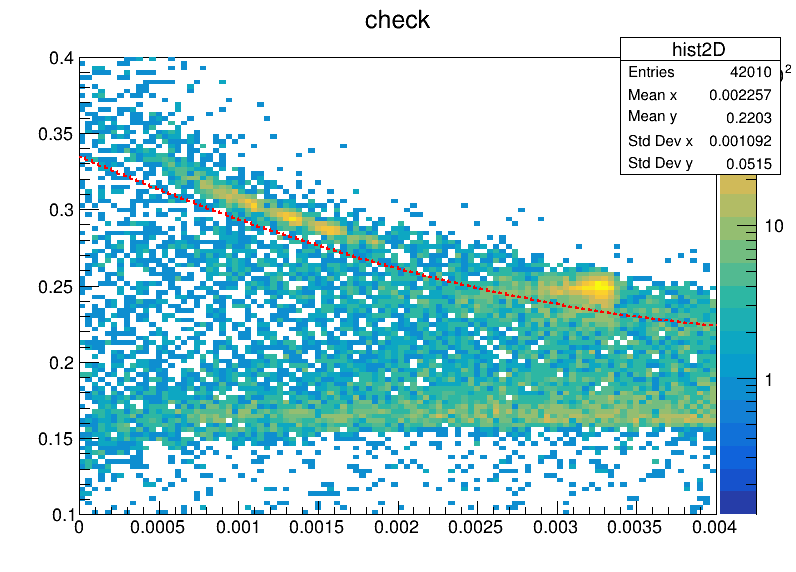

In [42]:
hist2D = rt.TH2F("hist2D","check",100,0,4e-3,100,0.1,0.4)
h_PTOF_chi2 = rt.TH2F("h_PTOF_chi2","h_PTOF_chi2",100,0,4e-6,1000,0,1e10)
c = rt.TCanvas("c","c",800,600)
#PCINTall[mask]/PTINTall[mask],PTINTall[mask]
for i in tqdm(range(len(events['PTINTall']))):
    if(mask[i] == 0):
        continue
    hist2D.Fill(events['PTINTall'][i],events['PCINTall'][i]/events['PTINTall'][i])
#     if((events['PTINTall'][i] > 0.003 and events['PTINTall'][i] < 0.0034) and (events['PCINTall'][i]/events['PTINTall'][i] > 0.24)):
#         print(i)

hist2D.Draw("colz")
cut_func = rt.TF1("cut_func","0.335 - 45.91*x + 4524.57*x*x",0,0.004)
cut_func.SetLineColor(rt.kRed)
cut_func.SetLineStyle(2)
cut_func.SetLineWidth(2)
cut_func.Draw("SAMES")
rt.gPad.SetLogz()
c.Draw()
    

In [ ]:
cleaning_cut = mask & ((events['PCINTall']/events['PTINTall']) > (0.335 - 45.91*events['PTINTall'] + 4524.57*np.square(events['PTINTall'])))


(0.0025, 0.0038)

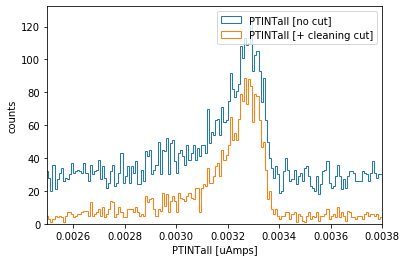

In [47]:
plt.hist(events['PTINTall'][mask],bins=500,range=[0,4e-3],histtype='step',label="PTINTall [no cut]")
plt.xlabel('PTINTall [uAmps]')
plt.ylabel('counts')
plt.legend(loc='best')
plt.hist(events['PTINTall'][cleaning_cut],bins=500,range=[0,4e-3],histtype='step',label="PTINTall [+ cleaning cut]")
plt.xlabel('PTINTall [uAmps]')
plt.ylabel('counts')
plt.legend(loc='best')
plt.xlim(0.0025,0.0038)

In [41]:
n = 1121

channel = "PA"
print ("Channel = ",channel)
print ("OF = ",events[channel+"OFamps"][n]*1e6)
print ("chi2 = ",events[channel+"OFchisq"][n])
print ("INTall = ",events[channel+"INTall"][n]*1e6)

# print("PAOF : chi2 = ",PAOFamps[n]*1e6," : ",PAOFchisq[n])
# print("PBOF : chi2 = ",PBOFamps[n]*1e6," : ",PBOFchisq[n])
# print("PCOF : chi2 = ",PCOFamps[n]*1e6," : ",PCOFchisq[n])
# print("PDOF : chi2 = ",PDOFamps[n]*1e6," : ",PDOFchisq[n])
# print("PEOF : chi2 = ",PEOFamps[n]*1e6," : ",PEOFchisq[n])
# print("PTOF : chi2 = ",PTOFamps[n]*1e6," : ",PTOFchisq[n])


# print("PAINT = ",PAINTall[n]*1e6)
# print("PBINT = ",PBINTall[n]*1e6)
# print("PCINT = ",PCINTall[n]*1e6)
# print("PDINT = ",PDINTall[n]*1e6)
# print("PEINT = ",PEINTall[n]*1e6)




Channel =  PA
OF =  1.8729745224994194
chi2 =  992966.6728943214
INTall =  832.9352574562715
